In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
import math 

# Подготовка

In [120]:
data = pd.read_excel(r"C:\Users\nev1L\Downloads\12_Борисов_Факторинг.xlsx", "Лист3")
data

,Учетная дата проводки,Дебет,Кредит,Сумма,Валюта проводки Дт,Сумма в валюте проводки Дт,Валюта проводки Кт,Сумма в валюте проводки Кт,Реальная дата проводки,Реальное время (час),Реальное время (минута),Автор проводки,Документ,Документ номер,Комментарий,Содержание
0,01.01.2023,26,05,136919.76,NaN,NaN,NaN,NaN,01.01.2023,NaN,NaN,Козлова Людмила Станиславовна,Операция 00БП-000212 от 01.01.2023 0:00:04,00БП-000212,NaN,Амартизация ОС за Декабрь 2020
1,01.01.2023,NaN,002,-13.00,NaN,NaN,NaN,NaN,01.01.2023,NaN,NaN,Козлова Людмила Станиславовна,Операция 00БП-000002 от 01.01.2023 0:00:00,00БП-000002,NaN,NaN
2,01.01.2023,МЦ.04,МЦ.04,5000.00,NaN,NaN,NaN,NaN,01.01.2023,NaN,NaN,Козлова Людмила Станиславовна,Операция 00БП-000211 от 01.01.2023 0:00:00,00БП-000211,NaN,Корректировка Передача материалов в эксплуатац...
3,01.01.2023,68.90,68.04.1,5042548.00,NaN,NaN,NaN,NaN,01.01.2023,NaN,NaN,Чиханчина Светлана Юрьевна,Операция по единому налоговому счету 00БП-0000...,00БП-000003,#Документ создан автоматически при переходе на...,Единый налоговый счет: пополнение переплата по...
4,01.01.2023,68.90,68.01.1,500.00,NaN,NaN,NaN,NaN,01.01.2023,NaN,NaN,Чиханчина Светлана Юрьевна,Операция по единому налоговому счету 00БП-0000...,00БП-000003,#Документ создан автоматически при переходе на...,Единый налоговый счет: пополнение переплата шт...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82476,31.01.2023,012.2,012.1,1551229.91,NaN,NaN,NaN,NaN,31.01.2023,NaN,NaN,NaN,Распоряжение ЦФТ-7412566898 от 31.01.2023 10:1...,11 113 712 911,NaN,Постановка на учет профинансированой накладной
82477,31.01.2023,76.06,62.01.1,1.69,NaN,NaN,NaN,NaN,31.01.2023,NaN,NaN,NaN,Распоряжение ЦФТ-7413088666 от 31.01.2023 14:0...,11 113 713 915,NaN,Зачет комиссии/
82478,31.01.2023,58.05.1,76.06,394818.24,NaN,NaN,NaN,NaN,31.01.2023,NaN,NaN,NaN,Распоряжение ЦФТ-7413286882 от 31.01.2023 14:2...,11 113 713 937,NaN,"Отражается финансирование, направленное Клиенту"
82479,31.01.2023,90.03,68.02,132564.13,NaN,NaN,NaN,NaN,31.01.2023,NaN,NaN,Холодова Вероника Игоревна,"Реализация (акт, накладная, УПД) 00БП-000379 о...",00БП-000379,#ФК_ФормированиеАктов_Факторинг безпени,Реализация услуг


In [4]:
len(data[data["Сумма"].isna()])

14

In [5]:
old_data_size = len(data["Сумма"])
data = data.dropna(subset=["Сумма"])
new_data_size = len(data["Сумма"])
print(old_data_size)
print(new_data_size)

82481
82467


In [6]:
data = data[data["Сумма"] >= 1]
len(data)

81082

<Axes: >

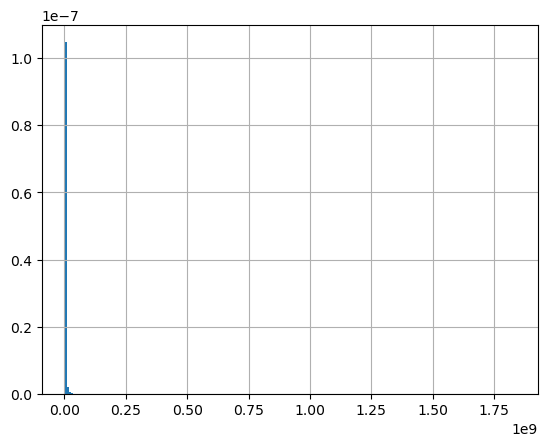

In [17]:
data["Сумма"].hist(density=True, bins=200)

In [18]:
max_val = max(data["Сумма"])
min_val = min(data["Сумма"])
print("Максимальное значение: ", max_val)
print("Минимальное значение: ", min_val)
print("Логарифм разницы: ", math.log10(max_val - min_val) ) 

Максимальное значение:  1836845384.15
Минимальное значение:  1.0
Логарифм разницы:  9.264072601014117


# Тест первой цифры

In [19]:
summa = pd.DataFrame(data.iloc[:, 3]).set_axis(["Summ"], axis=1)
summa

,Summ
0,136919.76
2,5000.00
3,5042548.00
4,500.00
5,10457.43
...,...
82476,1551229.91
82477,1.69
82478,394818.24
82479,132564.13


In [20]:
def search_first_digit(x):
    s = str(x)
    for c in s:
        if c != "0" and c.isdigit():
            return c
            break
    return 0

In [21]:
summa["first_digit"] = summa["Summ"].apply(search_first_digit)
summa

,Summ,first_digit
0,136919.76,1
2,5000.00,5
3,5042548.00,5
4,500.00,5
5,10457.43,1
...,...,...
82476,1551229.91,1
82477,1.69,1
82478,394818.24,3
82479,132564.13,1


In [22]:
first_digits_count = pd.DataFrame(summa.value_counts("first_digit"))
first_digits_count = first_digits_count.set_axis(["amount"], axis=1)
first_digits_count

,amount
first_digit,
1,24451
2,15035
3,9831
4,8135
5,6525
6,5258
7,4339
8,4009
9,3499


In [23]:
first_digits_count["empire_probability"] = first_digits_count.iloc[:, 0] / sum(first_digits_count.iloc[:, 0]) * 100
df = first_digits_count
df.index = index=[i for i in range(1, 10)]
df = df.reset_index().rename(columns={"index" : "digit"})
df


,digit,amount,empire_probability
0,1,24451,30.155892
1,2,15035,18.542957
2,3,9831,12.124763
3,4,8135,10.033053
4,5,6525,8.047409
5,6,5258,6.484793
6,7,4339,5.351373
7,8,4009,4.944377
8,9,3499,4.315384


In [24]:
df["theoretical_probability"] = [0.301, 0.1761, 0.1249, 0.0969, 0.0792, 0.0669, 0.0578, 0.0512, 0.0458]
df["theoretical_probability"] = df["theoretical_probability"] * 100
df

,digit,amount,empire_probability,theoretical_probability
0,1,24451,30.155892,30.10
1,2,15035,18.542957,17.61
2,3,9831,12.124763,12.49
3,4,8135,10.033053,9.69
4,5,6525,8.047409,7.92
5,6,5258,6.484793,6.69
6,7,4339,5.351373,5.78
7,8,4009,4.944377,5.12
8,9,3499,4.315384,4.58


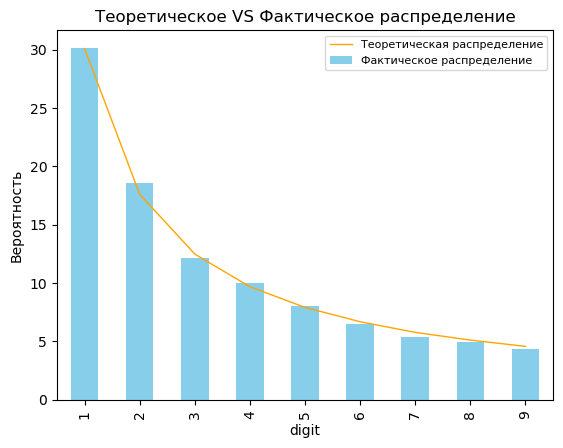

In [25]:
fig, ax = plt.subplots()

df.plot(x='digit', y='empire_probability', kind='bar', ax=ax, color='skyblue', label='Фактическое распределение')

x_positions = np.arange(len(df['digit']))

ax.plot(x_positions, df['theoretical_probability'], color='orange', linewidth=1, label='Теоретическая распределение')


plt.title('Теоретическое VS Фактическое распределение')
plt.ylabel('Вероятность')
plt.legend(loc='upper right', fontsize=8)

plt.show()

In [26]:
df["empire_probability"] = df["empire_probability"] / 100
df["theoretical_probability"] = df["theoretical_probability"] / 100


df

,digit,amount,empire_probability,theoretical_probability
0,1,24451,0.301559,0.3010
1,2,15035,0.185430,0.1761
2,3,9831,0.121248,0.1249
3,4,8135,0.100331,0.0969
4,5,6525,0.080474,0.0792
5,6,5258,0.064848,0.0669
6,7,4339,0.053514,0.0578
7,8,4009,0.049444,0.0512
8,9,3499,0.043154,0.0458


In [27]:

df["z_stat"] = (abs(df["empire_probability"] - df["theoretical_probability"]) - (2 / df["amount"])) / ((df["empire_probability"] * (1 - df["empire_probability"])) / df["amount"] ) ** 0.5
df

,digit,amount,empire_probability,theoretical_probability,z_stat
0,1,24451,0.301559,0.3010,0.162564
1,2,15035,0.185430,0.1761,2.901499
2,3,9831,0.121248,0.1249,1.047645
3,4,8135,0.100331,0.0969,0.956063
4,5,6525,0.080474,0.0792,0.287319
5,6,5258,0.064848,0.0669,0.492242
6,7,4339,0.053514,0.0578,1.119631
7,8,4009,0.049444,0.0512,0.367223
8,9,3499,0.043154,0.0458,0.603904


In [28]:
AP_arr = df["empire_probability"].tolist()
EP_arr = df["theoretical_probability"].tolist()
N_arr = df["amount"].tolist()

ch2 = 0
for i in range(len(N_arr)):
    ch2 += (N_arr[i] * (AP_arr[i] - EP_arr[i])**2) / EP_arr[i]

print("Экспереметальное значение хи-квадрат:", ch2)
print("Критическое значение хи-квадра:", chi2.ppf(0.95, 8))



Экспереметальное значение хи-квадрат: 12.115033619773332
Критическое значение хи-квадра: 15.50731305586545


In [29]:
AP_arr = df["empire_probability"].tolist()
EP_arr = df["theoretical_probability"].tolist()

MAD = 0
for i in range(len(EP_arr)):
    MAD += abs((AP_arr[i] - EP_arr[i]))
    
MAD /= 8
MAD

0.003623274586221352

# Тест второй цифры

In [30]:
def search_second_digit(x):
    s = str(x)
    flag = False
    
    for c in s:
        
        if c.isdigit() and flag == True:
            return c
            break
        
        if c != "0" and c.isdigit() and flag == False:
            flag = True
            
            
    return "0"

In [31]:
summa = summa[summa["Summ"] >= 10]
summa["second_digit"] = summa["Summ"].apply(search_second_digit)
summa

C:\Users\nev1L\AppData\Local\Temp\ipykernel_7912\3414106285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summa["second_digit"] = summa["Summ"].apply(search_second_digit)


,Summ,first_digit,second_digit
0,136919.76,1,3
2,5000.00,5,0
3,5042548.00,5,0
4,500.00,5,0
5,10457.43,1,0
...,...,...,...
82475,439222.59,4,3
82476,1551229.91,1,5
82478,394818.24,3,9
82479,132564.13,1,3


In [32]:
df1 = pd.DataFrame()
second_digits_count = pd.DataFrame(summa.value_counts("second_digit"))

second_digits_count = second_digits_count.set_axis(["amount"], axis=1)

second_digits_count["empire_probability"] = second_digits_count.iloc[:, 0] / sum(second_digits_count.iloc[:, 0]) * 100
df1 = second_digits_count
df1 = df1.reset_index().rename(columns={"index" : "digit"})
df1

,second_digit,amount,empire_probability
0,0,12303,16.119016
1,1,7900,10.350339
2,2,7776,10.187878
3,5,7763,10.170846
4,3,7501,9.827582
5,4,7390,9.682153
6,6,6649,8.711317
7,7,6608,8.657600
8,8,6256,8.196421
9,9,6180,8.096848


In [33]:
df1["theoretical_probability"] = [0.1197, 0.1139, 0.1088, 0.1043, 0.1003, 0.0967, 0.0934, 0.0904, 0.0876, 0.0850]
df1["theoretical_probability"] = df1["theoretical_probability"] * 100
df1 = df1.rename(columns={"second_digit" : "digit"})
df1

,digit,amount,empire_probability,theoretical_probability
0,0,12303,16.119016,11.97
1,1,7900,10.350339,11.39
2,2,7776,10.187878,10.88
3,5,7763,10.170846,10.43
4,3,7501,9.827582,10.03
5,4,7390,9.682153,9.67
6,6,6649,8.711317,9.34
7,7,6608,8.657600,9.04
8,8,6256,8.196421,8.76
9,9,6180,8.096848,8.50


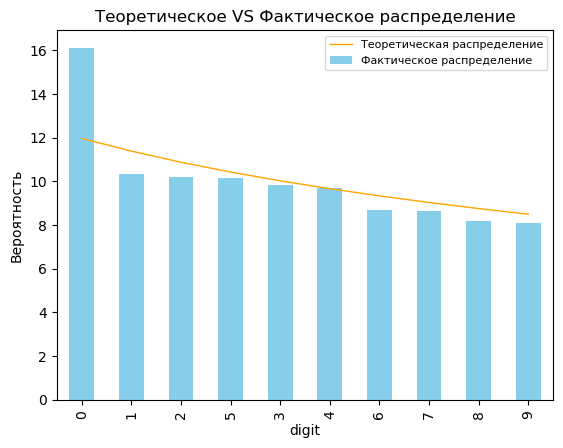

In [34]:
fig, ax = plt.subplots()

df1.plot(x='digit', y='empire_probability', kind='bar', ax=ax, color='skyblue', label='Фактическое распределение')

x_positions = np.arange(len(df1['digit']))

ax.plot(x_positions, df1['theoretical_probability'], color='orange', linewidth=1, label='Теоретическая распределение')


plt.title('Теоретическое VS Фактическое распределение')
plt.ylabel('Вероятность')
plt.legend(loc='upper right', fontsize=8)

plt.show()

In [35]:
df1["empire_probability"] = df1["empire_probability"] / 100
df1["theoretical_probability"] = df1["theoretical_probability"] / 100


df1

,digit,amount,empire_probability,theoretical_probability
0,0,12303,0.161190,0.1197
1,1,7900,0.103503,0.1139
2,2,7776,0.101879,0.1088
3,5,7763,0.101708,0.1043
4,3,7501,0.098276,0.1003
5,4,7390,0.096822,0.0967
6,6,6649,0.087113,0.0934
7,7,6608,0.086576,0.0904
8,8,6256,0.081964,0.0876
9,9,6180,0.080968,0.0850


In [36]:

df1["z_stat"] = (abs(df1["empire_probability"] - df1["theoretical_probability"]) - (2 / df1["amount"])) / ((df1["empire_probability"] * (1 - df1["empire_probability"])) / df1["amount"] ) ** 0.5
df1

,digit,amount,empire_probability,theoretical_probability,z_stat
0,0,12303,0.161190,0.1197,12.466503
1,1,7900,0.103503,0.1139,2.959697
2,2,7776,0.101879,0.1088,1.942696
3,5,7763,0.101708,0.1043,0.680317
4,3,7501,0.098276,0.1003,0.511337
5,4,7390,0.096822,0.0967,-0.043346
6,6,6649,0.087113,0.0934,1.730879
7,7,6608,0.086576,0.0904,1.017905
8,8,6256,0.081964,0.0876,1.532850
9,9,6180,0.080968,0.0850,1.068560


In [37]:
df1_AP_arr = df1["empire_probability"].tolist()
df1_EP_arr = df1["theoretical_probability"].tolist()
df1_N_arr = df1["amount"].tolist()

ch2 = 0
for i in range(len(df1_N_arr)):
    ch2 += (df1_N_arr[i] * (df1_AP_arr[i] - df1_EP_arr[i])**2) / df1_EP_arr[i]

print("Экспереметальное значение хи-квадрат:", ch2)
print("Критическое значение хи-квадра:", chi2.ppf(0.95, 9))


Экспереметальное значение хи-квадрат: 195.9929300360311
Критическое значение хи-квадра: 16.918977604620448


In [38]:
AP_arr = df1["empire_probability"].tolist()
EP_arr = df1["theoretical_probability"].tolist()

MAD = 0
for i in range(len(EP_arr)):
    MAD += abs((AP_arr[i] - EP_arr[i]))
    
MAD /= 9
MAD 

0.00925815260272457

# Тест первого порядка

In [39]:
summa

,Summ,first_digit,second_digit
0,136919.76,1,3
2,5000.00,5,0
3,5042548.00,5,0
4,500.00,5,0
5,10457.43,1,0
...,...,...,...
82475,439222.59,4,3
82476,1551229.91,1,5
82478,394818.24,3,9
82479,132564.13,1,3


In [40]:
summa["first_2_digs"] = summa["first_digit"] + summa["second_digit"]
summa

C:\Users\nev1L\AppData\Local\Temp\ipykernel_7912\844224417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summa["first_2_digs"] = summa["first_digit"] + summa["second_digit"]


,Summ,first_digit,second_digit,first_2_digs
0,136919.76,1,3,13
2,5000.00,5,0,50
3,5042548.00,5,0,50
4,500.00,5,0,50
5,10457.43,1,0,10
...,...,...,...,...
82475,439222.59,4,3,43
82476,1551229.91,1,5,15
82478,394818.24,3,9,39
82479,132564.13,1,3,13


In [41]:
df2 = pd.DataFrame()
first2_digits_count = pd.DataFrame(summa.value_counts("first_2_digs"))

first2_digits_count = first2_digits_count.set_axis(["amount"], axis=1)

first2_digits_count["empire_probability"] = first2_digits_count.iloc[:, 0] / sum(first2_digits_count.iloc[:, 0]) * 100
df2 = first2_digits_count
df2 = df2.reset_index().rename(columns={"index" : "val"})
df2["first_2_digs"] = df2["first_2_digs"].apply(int)
df2 = df2.sort_values("first_2_digs")
df2

,first_2_digs,amount,empire_probability
0,10,4339,5.684826
1,11,2700,3.537458
2,12,2585,3.386788
5,13,2184,2.861410
4,14,2226,2.916437
...,...,...,...
88,95,307,0.402222
87,96,309,0.404842
82,97,338,0.442837
79,98,344,0.450698


In [42]:
df2["theoretical_probability"] = (1 + 1 / df2["first_2_digs"]).apply(math.log10)
df2["theoretical_probability"] = df2["theoretical_probability"] * 100
df2

,first_2_digs,amount,empire_probability,theoretical_probability
0,10,4339,5.684826,4.139269
1,11,2700,3.537458,3.778856
2,12,2585,3.386788,3.476211
5,13,2184,2.861410,3.218468
4,14,2226,2.916437,2.996322
...,...,...,...,...
88,95,307,0.402222,0.454763
87,96,309,0.404842,0.450050
82,97,338,0.442837,0.445434
79,98,344,0.450698,0.440912


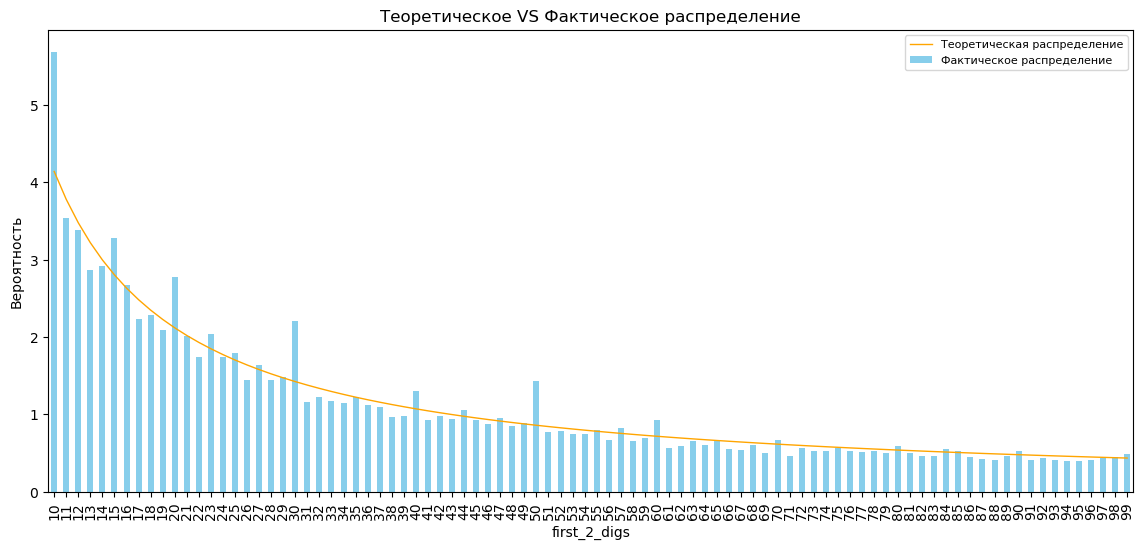

In [43]:
fig, ax = plt.subplots(figsize=(14, 6))


df2.plot(x='first_2_digs', y='empire_probability', kind='bar', ax=ax, color='skyblue', label='Фактическое распределение')

x_positions = np.arange(len(df2['first_2_digs']))

ax.plot(x_positions, df2['theoretical_probability'], color='orange', linewidth=1, label='Теоретическая распределение')


plt.title('Теоретическое VS Фактическое распределение')
plt.ylabel('Вероятность')
plt.legend(loc='upper right', fontsize=8)

plt.show()

In [44]:
df2["empire_probability"] = df2["empire_probability"] / 100
df2["theoretical_probability"] = df2["theoretical_probability"] / 100


df2

,first_2_digs,amount,empire_probability,theoretical_probability
0,10,4339,0.056848,0.041393
1,11,2700,0.035375,0.037789
2,12,2585,0.033868,0.034762
5,13,2184,0.028614,0.032185
4,14,2226,0.029164,0.029963
...,...,...,...,...
88,95,307,0.004022,0.004548
87,96,309,0.004048,0.004501
82,97,338,0.004428,0.004454
79,98,344,0.004507,0.004409


In [48]:

df2["z_stat"] = (abs(df2["empire_probability"] - df2["theoretical_probability"]) - (2 / df2["amount"])) / ((df2["empire_probability"] * (1 - df2["empire_probability"])) / df2["amount"] ) ** 0.5
df2

,first_2_digs,amount,empire_probability,theoretical_probability,z_stat
0,10,4339,0.056848,0.041393,4.265612
1,11,2700,0.035375,0.037789,0.470669
2,12,2585,0.033868,0.034762,0.033877
5,13,2184,0.028614,0.032185,0.744178
4,14,2226,0.029164,0.029963,-0.027933
...,...,...,...,...,...
88,95,307,0.004022,0.004548,-1.657998
87,96,309,0.004048,0.004501,-1.666647
82,97,338,0.004428,0.004454,-1.631185
79,98,344,0.004507,0.004409,-1.582764


In [117]:
df2[df2["z_stat"].apply(abs) > 1.96]

,first_2_digs,amount,empire_probability,theoretical_probability,z_stat
0,10,4339,0.056848,0.041393,4.265612


In [414]:
df2_AP_arr = df2["empire_probability"].tolist()
df2_EP_arr = df2["theoretical_probability"].tolist()
df2_N_arr = df2["amount"].tolist()

ch2 = 0
for i in range(len(df2_N_arr)):
    ch2 += (df2_N_arr[i] * (df2_AP_arr[i] - df2_EP_arr[i])**2) / df2_EP_arr[i]

print("Экспереметальное значение хи-квадрат:", ch2)
print("Критическое значение хи-квадра:", chi2.ppf(0.95, 89))

Экспереметальное значение хи-квадрат: 49.09713342126927
Критическое значение хи-квадра: 112.02198574980785


In [415]:
df2_AP_arr = df2["empire_probability"].tolist()
df2_EP_arr = df2["theoretical_probability"].tolist()

MAD = 0
for i in range(len(EP_arr)):
    MAD += abs((df2_AP_arr[i] - df2_EP_arr[i]))
    
MAD /= 89
MAD

0.00036816255721057407

# Тест дублирования сумм

In [76]:
ser = data["Сумма"]
ser

0         136919.76
2           5000.00
3        5042548.00
4            500.00
5          10457.43
            ...    
82476    1551229.91
82477          1.69
82478     394818.24
82479     132564.13
82480      97809.69
Name: Сумма, Length: 81082, dtype: float64

In [77]:
df3 = pd.DataFrame(ser.value_counts())
df3 = df3.reset_index()
df3
df3 = df3.rename(columns={"index" : "val","Сумма" : "amount"})
df3 = df3.head(30)
df3.head()

,val,amount
0,10.0,1024
1,2.0,742
2,20.0,528
3,4.0,425
4,50.0,393


<Axes: xlabel='val'>

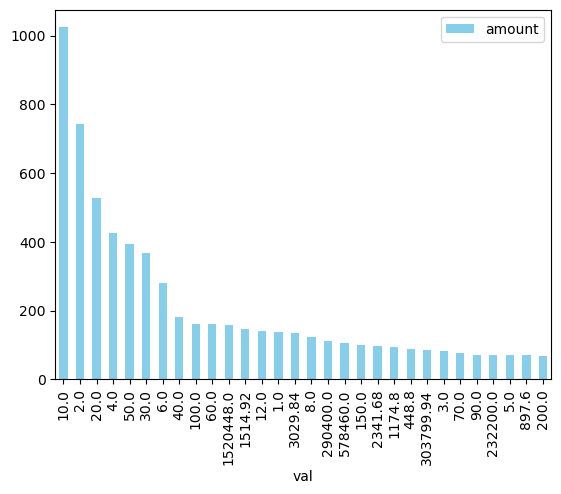

In [78]:
df3.plot(x='val', y='amount', kind='bar', color='skyblue')

In [118]:
top10_sum = df3.head(10)
top10_sum

,val,amount
0,10.0,1024
1,2.0,742
2,20.0,528
3,4.0,425
4,50.0,393
5,30.0,369
6,6.0,280
7,40.0,182
8,100.0,162
9,60.0,160


# Тест последних двух цифр

In [95]:
summa2 = pd.DataFrame(data.iloc[:, 3]).set_axis(["Summ"], axis=1)
summa2

,Summ
0,136919.76
2,5000.00
3,5042548.00
4,500.00
5,10457.43
...,...
82476,1551229.91
82477,1.69
82478,394818.24
82479,132564.13


In [96]:
def serch_2_last_digs(x):
    s = str(x)
    res = s.split(".")[1]
    
    if res in [str(i) for i in range(10)]:
        return res + "0"
    else:
        return res


In [97]:
summa2["last_2_digs"] = summa2["Summ"].apply(serch_2_last_digs)
summa2

,Summ,last_2_digs
0,136919.76,76
2,5000.00,00
3,5042548.00,00
4,500.00,00
5,10457.43,43
...,...,...
82476,1551229.91,91
82477,1.69,69
82478,394818.24,24
82479,132564.13,13


In [98]:
df4 = pd.DataFrame()
last2_digits_count = pd.DataFrame(summa2.value_counts("last_2_digs"))

last2_digits_count = last2_digits_count.set_axis(["amount"], axis=1)

last2_digits_count["empire_probability"] = last2_digits_count.iloc[:, 0] / sum(last2_digits_count.iloc[:, 0]) * 100
df4 = last2_digits_count
df4 = df4.reset_index().rename(columns={"index" : "val"})
df4 = df4.sort_values("last_2_digs")
df4

,last_2_digs,amount,empire_probability
0,00,20475,25.252214
75,01,475,0.585827
36,02,577,0.711625
65,03,486,0.599393
25,04,708,0.873190
...,...,...,...
91,95,444,0.547594
12,96,791,0.975556
98,97,425,0.524161
33,98,600,0.739992


In [101]:
df4["theoretical_probability"] = 1.1
df4

,last_2_digs,amount,empire_probability,theoretical_probability
0,00,20475,25.252214,1.1
75,01,475,0.585827,1.1
36,02,577,0.711625,1.1
65,03,486,0.599393,1.1
25,04,708,0.873190,1.1
...,...,...,...,...
91,95,444,0.547594,1.1
12,96,791,0.975556,1.1
98,97,425,0.524161,1.1
33,98,600,0.739992,1.1


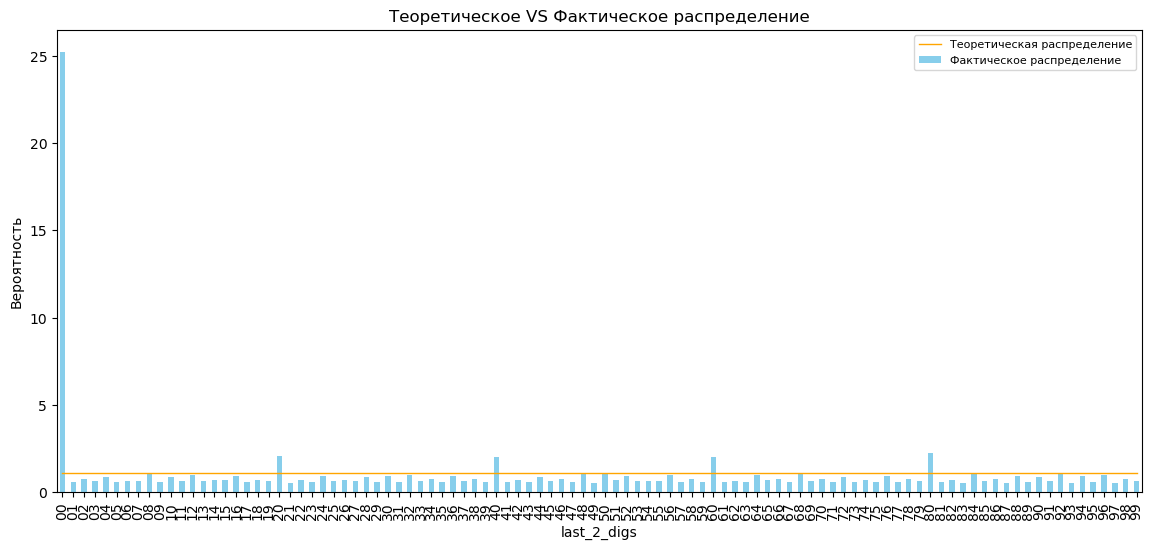

In [102]:
fig, ax = plt.subplots(figsize=(14, 6))


df4.plot(x='last_2_digs', y='empire_probability', kind='bar', ax=ax, color='skyblue', label='Фактическое распределение')

x_positions = np.arange(len(df4['last_2_digs']))


ax.plot(x_positions, df4["theoretical_probability"], color='orange', linewidth=1, label='Теоретическая распределение')


plt.title('Теоретическое VS Фактическое распределение')
plt.ylabel('Вероятность')
plt.legend(loc='upper right', fontsize=8)

plt.show()

In [103]:
df4["empire_probability"] = df4["empire_probability"] / 100
df4["theoretical_probability"] = df4["theoretical_probability"] / 100


df4

,last_2_digs,amount,empire_probability,theoretical_probability
0,00,20475,0.252522,0.011
75,01,475,0.005858,0.011
36,02,577,0.007116,0.011
65,03,486,0.005994,0.011
25,04,708,0.008732,0.011
...,...,...,...,...
91,95,444,0.005476,0.011
12,96,791,0.009756,0.011
98,97,425,0.005242,0.011
33,98,600,0.007400,0.011


In [104]:
df4["z_stat"] = (abs(df4["empire_probability"] - df4["theoretical_probability"]) - (2 / df4["amount"])) / ((df4["empire_probability"] * (1 - df4["empire_probability"])) / df4["amount"] ) ** 0.5
df4

,last_2_digs,amount,empire_probability,theoretical_probability,z_stat
0,00,20475,0.252522,0.011,79.514132
75,01,475,0.005858,0.011,0.265940
36,02,577,0.007116,0.011,0.119320
65,03,486,0.005994,0.011,0.254430
25,04,708,0.008732,0.011,-0.159234
...,...,...,...,...,...
91,95,444,0.005476,0.011,0.291116
12,96,791,0.009756,0.011,-0.367415
98,97,425,0.005242,0.011,0.300490
33,98,600,0.007400,0.011,0.076240


In [108]:
df4[abs(df4["z_stat"]) > 1.96]

,last_2_digs,amount,empire_probability,theoretical_probability,z_stat
0,00,20475,0.252522,0.011,79.514132
2,20,1685,0.020781,0.011,2.473104
4,40,1599,0.019721,0.011,2.148363
3,60,1606,0.019807,0.011,2.174856
1,80,1824,0.022496,0.011,2.995057


In [109]:
df4_AP_arr = df4["empire_probability"].tolist()
df4_EP_arr = df4["theoretical_probability"].tolist()
df4_N_arr = df4["amount"].tolist()

ch2 = 0
for i in range(len(df4_N_arr)):
    ch2 += (df4_N_arr[i] * (df4_AP_arr[i] - df4_EP_arr[i])**2) / df4_EP_arr[i]

print("Экспереметальное значение хи-квадрат:", ch2)
print("Критическое значение хи-квадра:", chi2.ppf(0.95, 99))

Экспереметальное значение хи-квадрат: 108716.9724284556
Критическое значение хи-квадра: 123.2252214533618


# Оценка коэфициента искажения


In [110]:
summa5 = pd.DataFrame(data.iloc[:, 3]).set_axis(["summa"], axis=1)
summa5 = summa5[summa5["summa"] >= 10]
summa5

,summa
0,136919.76
2,5000.00
3,5042548.00
4,500.00
5,10457.43
...,...
82475,439222.59
82476,1551229.91
82478,394818.24
82479,132564.13


In [111]:
summa5["digits"] = (10 * summa5["summa"] / (10 ** summa5["summa"].apply(math.log10).apply(int))).apply(int)
summa5

,summa,digits
0,136919.76,13
2,5000.00,50
3,5042548.00,50
4,500.00,50
5,10457.43,10
...,...,...
82475,439222.59,43
82476,1551229.91,15
82478,394818.24,39
82479,132564.13,13


In [112]:
AM_5 = sum(summa5["digits"]) / len(summa5["digits"])

EM_5 = 90 / (len(summa5["digits"]) * (10 ** (1 / len(summa5["digits"])) - 1))

DF_5 = (AM_5 - EM_5) / EM_5 * 100

sd_5 = ( sum( (summa5["digits"] - AM_5)**2 ) / len(summa5["digits"]) ) ** 0.5 

z_5 = DF_5 / sd_5


print("AM =", AM_5)
print("EM =", EM_5)
print("DF =", DF_5)
print("SD =", sd_5)
print("Z =", z_5)

AM = 37.67678117548411
EM = 39.0859137980141
DF = -3.6052185700762207
SD = 24.69879611358653
Z = -0.14596738049483435


# Тест суммирования

In [435]:
summa5

,summa,digits
0,136919.76,13
2,5000.00,50
3,5042548.00,50
4,500.00,50
5,10457.43,10
...,...,...
82475,439222.59,43
82476,1551229.91,15
82478,394818.24,39
82479,132564.13,13


In [436]:
df7 = summa5.groupby("digits").aggregate({"summa" : "sum"})
df7

,summa
digits,
10,6.265067e+09
11,1.062040e+10
12,6.403806e+09
13,4.023575e+09
14,3.748646e+09
...,...
95,6.469314e+08
96,9.586634e+08
97,9.201609e+08


In [437]:
df7["norm_sum"] = df7["summa"] / sum(df7["summa"])
df7["e_val"] = 0.011
df7 = df7.reset_index()
df7

,digits,summa,norm_sum,e_val
0,10,6.265067e+09,0.033441,0.011
1,11,1.062040e+10,0.056688,0.011
2,12,6.403806e+09,0.034181,0.011
3,13,4.023575e+09,0.021477,0.011
4,14,3.748646e+09,0.020009,0.011
...,...,...,...,...
85,95,6.469314e+08,0.003453,0.011
86,96,9.586634e+08,0.005117,0.011
87,97,9.201609e+08,0.004912,0.011
88,98,5.062085e+08,0.002702,0.011


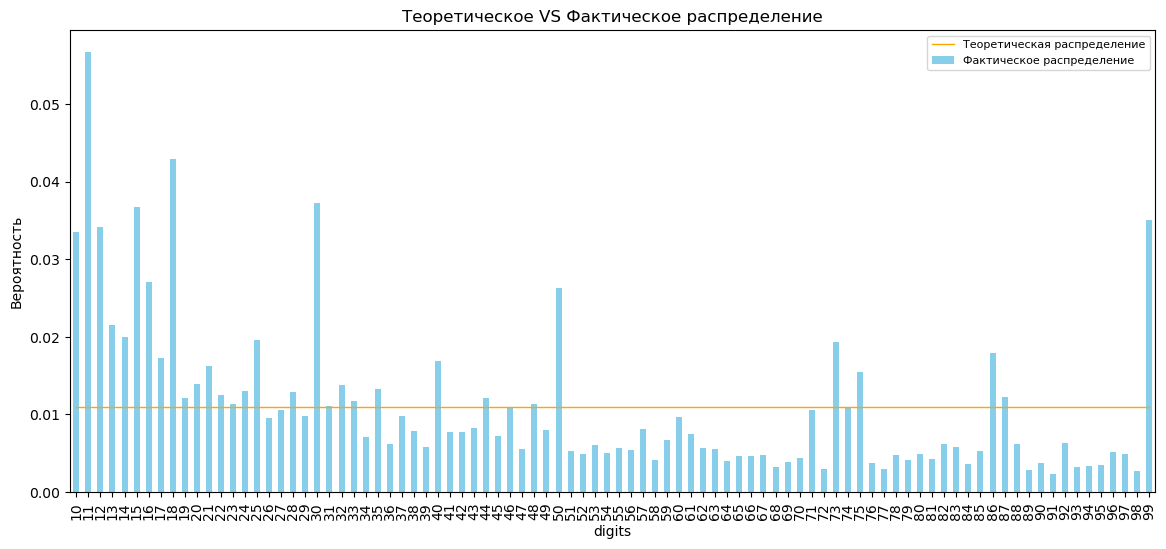

In [438]:
fig, ax = plt.subplots(figsize=(14, 6))


df7.plot(x='digits', y='norm_sum', kind='bar', ax=ax, color='skyblue', label='Фактическое распределение')

x_positions = np.arange(len(df7['digits']))

ax.plot(x_positions, df7['e_val'], color='orange', linewidth=1, label='Теоретическая распределение')


plt.title('Теоретическое VS Фактическое распределение')
plt.ylabel('Вероятность')
plt.legend(loc='upper right', fontsize=8)

plt.show()

# 

# Тест второго порядка 

In [50]:
sum8 = pd.DataFrame(data.iloc[:, 3]).set_axis(["sum"], axis=1)

In [51]:
sum8 = sum8.sort_values("sum", ascending=False)
sum8 = sum8.reset_index()
sum8 = sum8.drop(columns="index")
sum8

,sum
0,1.836845e+09
1,1.836845e+09
2,1.836845e+09
3,1.163400e+09
4,1.163400e+09
...,...
81077,1.000000e+00
81078,1.000000e+00
81079,1.000000e+00
81080,1.000000e+00


In [52]:
ser = sum8.iloc[1:, 0]
ser = pd.concat([ser, pd.Series([0])], ignore_index=True)
ser

0        1.836845e+09
1        1.836845e+09
2        1.163400e+09
3        1.163400e+09
4        1.120000e+09
             ...     
81077    1.000000e+00
81078    1.000000e+00
81079    1.000000e+00
81080    1.000000e+00
81081    0.000000e+00
Length: 81082, dtype: float64

In [53]:
sum8["next_sum"] = ser
sum8 = sum8[sum8["next_sum"] != 0]

sum8["sum - next_sum"] = sum8["sum"] - sum8["next_sum"]
sum8

C:\Users\nev1L\AppData\Local\Temp\ipykernel_7912\1223318708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum8["sum - next_sum"] = sum8["sum"] - sum8["next_sum"]


,sum,next_sum,sum - next_sum
0,1.836845e+09,1.836845e+09,0.000000e+00
1,1.836845e+09,1.836845e+09,0.000000e+00
2,1.836845e+09,1.163400e+09,6.734454e+08
3,1.163400e+09,1.163400e+09,0.000000e+00
4,1.163400e+09,1.120000e+09,4.340000e+07
...,...,...,...
81076,1.000000e+00,1.000000e+00,0.000000e+00
81077,1.000000e+00,1.000000e+00,0.000000e+00
81078,1.000000e+00,1.000000e+00,0.000000e+00
81079,1.000000e+00,1.000000e+00,0.000000e+00


In [54]:
sum8 = sum8[sum8["sum - next_sum"] >= 10]
sum8

,sum,next_sum,sum - next_sum
2,1.836845e+09,1.163400e+09,6.734454e+08
4,1.163400e+09,1.120000e+09,4.340000e+07
6,1.120000e+09,8.769500e+08,2.430500e+08
8,8.769500e+08,8.654823e+08,1.146769e+07
11,8.654823e+08,7.500000e+08,1.154823e+08
...,...,...,...
57635,5.233000e+03,5.220120e+03,1.288000e+01
57762,5.075240e+03,5.064710e+03,1.053000e+01
57871,4.943820e+03,4.932300e+03,1.152000e+01
57910,4.904250e+03,4.893710e+03,1.054000e+01


In [57]:
sum8["digits"] = (10 * sum8["sum - next_sum"] / (10 ** sum8["sum - next_sum"].apply(math.log10).apply(int))).apply(int)
sum8

df8 = pd.DataFrame(sum8.value_counts("digits")).reset_index()
df8 = df8.set_axis(["digits", "amount"], axis=1)
df8 = df8.sort_values("digits")
df8

C:\Users\nev1L\AppData\Local\Temp\ipykernel_7912\671719981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum8["digits"] = (10 * sum8["sum - next_sum"] / (10 ** sum8["sum - next_sum"].apply(math.log10).apply(int))).apply(int)


,digits,amount
0,10,1135
1,11,996
2,12,957
3,13,826
5,14,737
...,...,...
78,95,87
80,96,83
85,97,76
88,98,60


In [58]:
df8["empire_probability"] = df8["amount"] / sum(df8["amount"]) * 100

df8["theoretical_probability"] = (1 + 1 / df8["digits"].apply(int)).apply(math.log10)
df8["theoretical_probability"] = df8["theoretical_probability"] * 100
df8

,digits,amount,empire_probability,theoretical_probability
0,10,1135,5.162611,4.139269
1,11,996,4.530362,3.778856
2,12,957,4.352968,3.476211
3,13,826,3.757107,3.218468
5,14,737,3.352286,2.996322
...,...,...,...,...
78,95,87,0.395724,0.454763
80,96,83,0.377530,0.450050
85,97,76,0.345690,0.445434
88,98,60,0.272913,0.440912


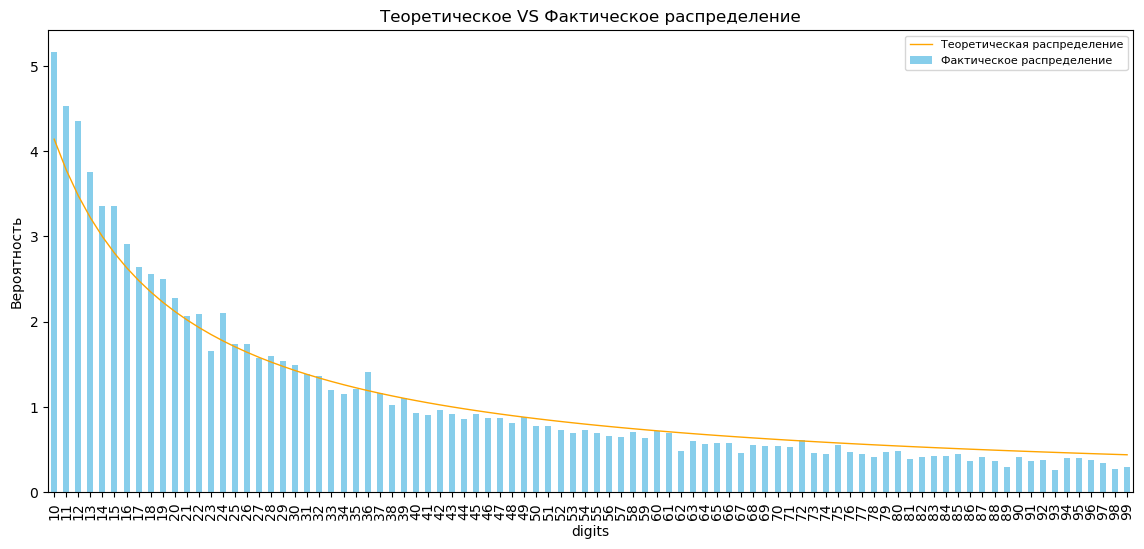

In [59]:
fig, ax = plt.subplots(figsize=(14, 6))


df8.plot(x='digits', y='empire_probability', kind='bar', ax=ax, color='skyblue', label='Фактическое распределение')

x_positions = np.arange(len(df8['digits']))

ax.plot(x_positions, df8['theoretical_probability'], color='orange', linewidth=1, label='Теоретическая распределение')


plt.title('Теоретическое VS Фактическое распределение')
plt.ylabel('Вероятность')
plt.legend(loc='upper right', fontsize=8)

plt.show()

In [60]:
df8["empire_probability"] = df8["empire_probability"] / 100
df8["theoretical_probability"] = df8["theoretical_probability"] / 100

df8["z_stat"] = (abs(df8["empire_probability"] - df8["theoretical_probability"]) - (2 / df8["amount"])) / ((df8["empire_probability"] * (1 - df8["empire_probability"])) / df8["amount"] ) ** 0.5
df8

,digits,amount,empire_probability,theoretical_probability,z_stat
0,10,1135,0.051626,0.041393,1.289805
1,11,996,0.045304,0.037789,0.835694
2,12,957,0.043530,0.034762,1.012407
3,13,826,0.037571,0.032185,0.448142
5,14,737,0.033523,0.029963,0.127585
...,...,...,...,...,...
78,95,87,0.003957,0.004548,-3.327636
80,96,83,0.003775,0.004501,-3.471885
85,97,76,0.003457,0.004454,-3.760543
88,98,60,0.002729,0.004409,-4.699767


In [69]:
df8 = df8[["digits", "z_stat"]]
df8[abs(df8["z_stat"]) > 1.96].set_axis(["Пара цифр", "Z-статистика"], axis=1)

,Пара цифр,Z-статистика
51,59,-1.986445
62,62,-2.488181
53,63,-2.129111
56,64,-2.248415
55,65,-2.226579
54,66,-2.229635
67,67,-2.692020
57,68,-2.333210
59,69,-2.388802
60,70,-2.401980


In [456]:
df8_AP_arr = df8["empire_probability"].tolist()
df8_EP_arr = df8["theoretical_probability"].tolist()
df8_N_arr = df8["amount"].tolist()

ch2 = 0
for i in range(len(df2_N_arr)):
    ch2 += (df8_N_arr[i] * (df8_AP_arr[i] - df8_EP_arr[i])**2) / df8_EP_arr[i]

print("Экспереметальное значение хи-квадрат:", ch2)
print("Критическое значение хи-квадра:", chi2.ppf(0.95, 89))

Экспереметальное значение хи-квадрат: 10.742121637207223
Критическое значение хи-квадра: 112.02198574980785


In [457]:
df8_AP_arr = df8["empire_probability"].tolist()
df8_EP_arr = df8["theoretical_probability"].tolist()

MAD = 0
for i in range(len(EP_arr)):
    MAD += abs((df8_AP_arr[i] - df8_EP_arr[i]))
    
MAD /= 89
MAD

0.0005632815127918015

# Тест мантисс

In [71]:
df9 = pd.DataFrame(data.iloc[:, 3]).set_axis(["sum"], axis=1)
df9

,sum
0,136919.76
2,5000.00
3,5042548.00
4,500.00
5,10457.43
...,...
82476,1551229.91
82477,1.69
82478,394818.24
82479,132564.13


In [72]:
df9["x"] = (2 * math.pi * (df9["sum"].apply(math.log10))).apply(math.cos)
df9["y"] = (2 * math.pi * (df9["sum"].apply(math.log10))).apply(math.sin)
df9

,sum,x,y
0,136919.76,0.654374,0.756171
2,5000.00,-0.315165,-0.949037
3,5042548.00,-0.293139,-0.956070
4,500.00,-0.315165,-0.949037
5,10457.43,0.992561,0.121748
...,...,...,...
82476,1551229.91,0.364171,0.931332
82477,1.69,0.138495,0.990363
82478,394818.24,-0.822114,-0.569322
82479,132564.13,0.718450,0.695579


In [73]:
x = sum(df9["x"]) / len(df9["x"])
y = sum(df9["y"]) / len(df9["y"])
print("x =", x)
print("y =", y)

x = -0.003220257056045514
y = 0.008131483593939873


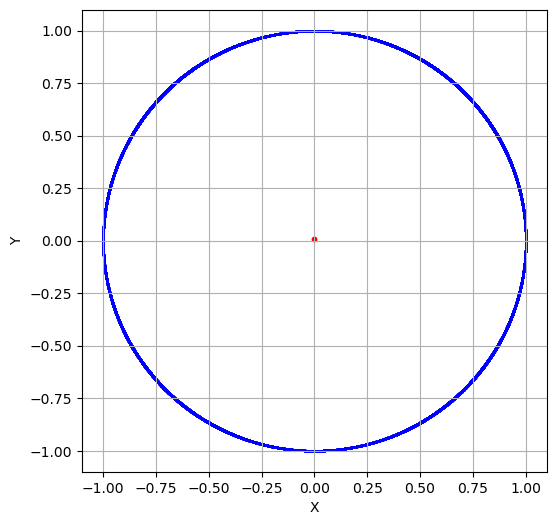

In [115]:
plt.figure(figsize=(6, 6))

plt.scatter(df9["x"], df9["y"], color='blue', linewidth=0.5, s=1)
plt.scatter(x, y, color='red', s=10, marker='o')

plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

In [75]:
L2 = x**2 + y**2
N = len(df9["x"]) 

p_val = 1 - math.e**(-1 * L2 * N)
print(L2)
print("p-value =", p_val)


7.649108094552423e-05
p-value = 0.9979747250811126


# Вывод

In [135]:
data1 = data.iloc[:, [3, -1]]
data1 = data1.set_axis(["sum", "type"], axis=1)
data1["type"] = data1["type"].apply(lambda x: x.split()[0] if type(x) == str else 0)
data1.nunique

,sum,type
0,136919.76,Амартизация
1,-13.00,0
2,5000.00,Корректировка
3,5042548.00,Единый
4,500.00,Единый
...,...,...
82476,1551229.91,Постановка
82477,1.69,Зачет
82478,394818.24,Отражается
82479,132564.13,Реализация
